# 1. Perkenalan

M2

Nama : Andryan kalmer wijaya
Batch : RMT 30



Dalam kasusu ini saya ingin menciptakan aplikasi untuk membantu masyrakat mengetahui jamur mana yang beracun atau tidak

https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

[wijayaa65/Milestone2](https://huggingface.co/spaces/wijayaa65/Milestone2)

# 2. import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
import json
import pickle

# 3. Data Loading

In [2]:
data=pd.read_csv('secondary_data.csv',delimiter=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).
Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f,
sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s,
shiny=h, leathery=l, silky=k, sticky=t,
wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p,
purple=u, red=e, white=w, yellow=y, blue=l,
orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e,
rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,
large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

In [4]:
#untuk mempermudah dan memper simple maka kita akan gunakan 11 kolom.
data=data[['class','cap-diameter','cap-shape','cap-surface','cap-color','stem-height','stem-width','stem-root','stem-surface','habitat','season']]

In [5]:
#sepuluh data awal
data.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,stem-height,stem-width,stem-root,stem-surface,habitat,season
0,p,15.26,x,g,o,16.95,17.09,s,y,d,w
1,p,16.60,x,g,o,17.99,18.19,s,y,d,u
2,p,14.07,x,g,o,17.80,17.74,s,y,d,w
3,p,14.17,f,h,e,15.77,15.98,s,y,d,w
4,p,14.64,x,h,o,16.53,17.20,s,y,d,w
5,p,15.34,x,g,o,17.84,18.79,s,y,d,u
6,p,14.85,f,h,o,17.71,16.89,s,y,d,w
7,p,14.86,x,h,e,17.03,17.44,s,y,d,u
8,p,12.85,f,g,o,17.27,18.69,s,y,d,a
9,p,13.55,f,g,e,16.04,16.88,s,y,d,w


In [6]:
#sepuluh data akhir
data.tail(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,stem-height,stem-width,stem-root,stem-surface,habitat,season
61059,p,1.15,f,s,y,2.83,5.07,NaN,NaN,d,u
61060,p,1.13,x,s,y,3.06,4.82,NaN,NaN,d,u
61061,p,1.25,x,s,y,4.40,6.61,NaN,NaN,d,a
61062,p,1.25,s,s,y,3.51,4.65,NaN,NaN,d,u
61063,p,1.42,x,s,y,4.88,5.80,NaN,NaN,d,a
61064,p,1.18,s,s,y,3.93,6.22,NaN,NaN,d,a
61065,p,1.27,f,s,y,3.18,5.43,NaN,NaN,d,a
61066,p,1.27,s,s,y,3.86,6.37,NaN,NaN,d,u
61067,p,1.24,f,s,y,3.56,5.44,NaN,NaN,d,u
61068,p,1.17,s,s,y,3.25,5.45,NaN,NaN,d,u


# 4. Exploratory Data Analysis (EDA)

## cap diameter

<Axes: >

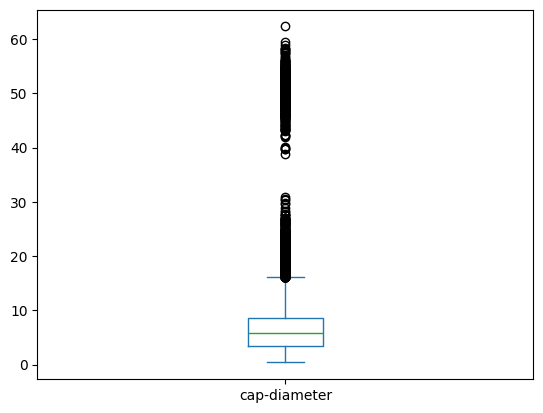

In [7]:
data['cap-diameter'].plot.box()

In [8]:
data['cap-diameter'].skew()

3.8228439765098257

data tidak berdistribui normal

In [9]:
data['cap-diameter'].kurtosis()

27.077466724882328

data memiliki pucuk yang tinggi

## Cap shape

<Axes: xlabel='cap-shape'>

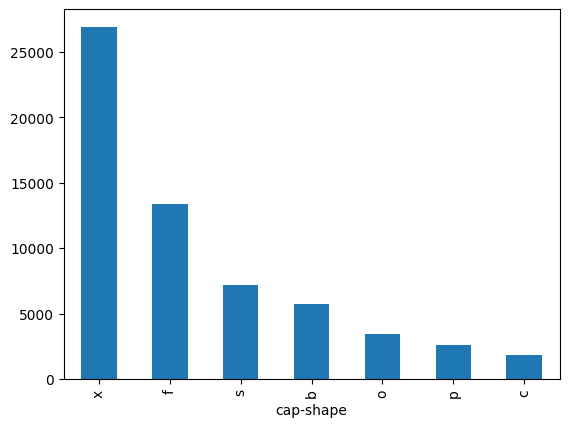

In [10]:
data['cap-shape'].value_counts().plot.bar()

data di dominasi oleh kelompok x

## Cap surface

<Axes: xlabel='cap-surface'>

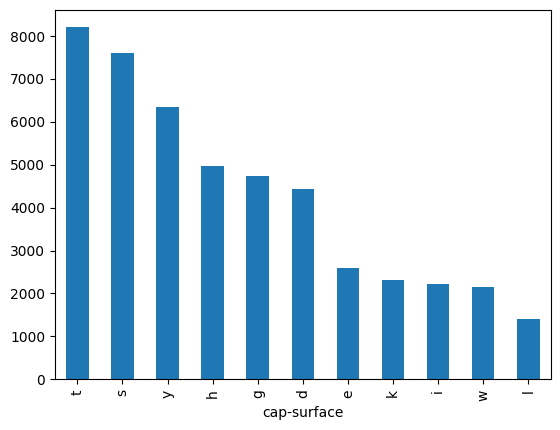

In [11]:
data['cap-surface'].value_counts().plot.bar()

data di dominasi oleh kelompok t

## Cap color 

<Axes: xlabel='cap-color'>

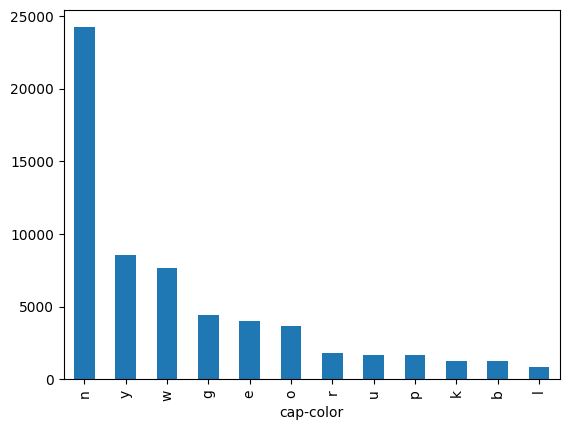

In [12]:
data['cap-color'].value_counts().plot.bar()

data di dominasi oleh kelompok n

## Stem height

<Axes: >

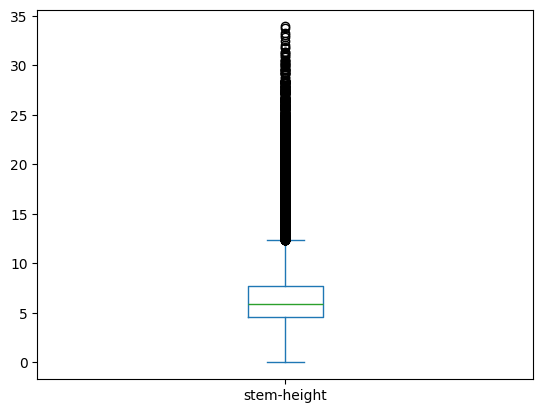

In [13]:
data['stem-height'].plot.box()

In [14]:
data['stem-height'].skew()

2.020903634555623

In [15]:
data['stem-height'].kurtosis()

7.682672158475622

data tidak berdistribusi normal dan memiliki pucuk yang tinggi

## stem width

<Axes: >

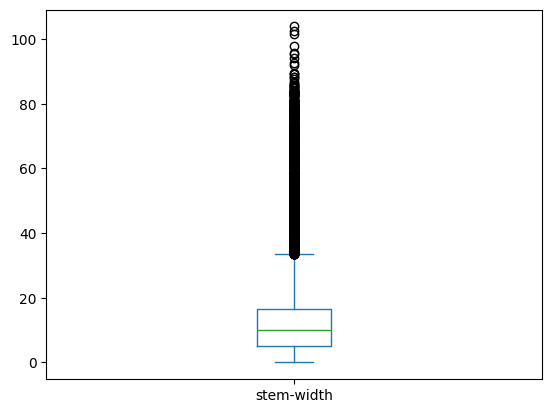

In [16]:
data['stem-width'].plot.box()

In [17]:
data['stem-width'].skew()

2.164956713058581

In [18]:
data['stem-width'].kurtosis()

8.768398768250847

data tidak berdsitribusi normal dan memiliki pucuk yang tinggi

## Stem root

<Axes: xlabel='stem-root'>

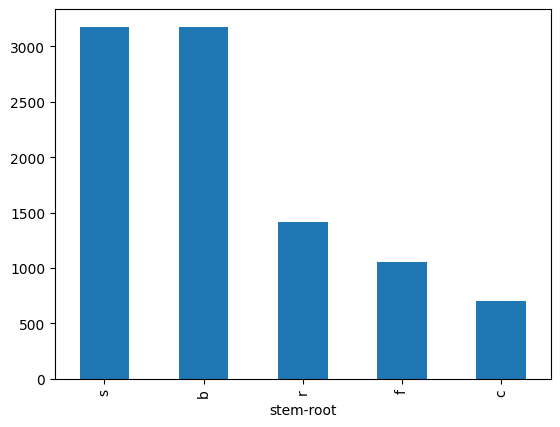

In [19]:
data['stem-root'].value_counts().plot.bar()

data di dominasi oleh s dan b

## stem surface

<Axes: xlabel='stem-surface'>

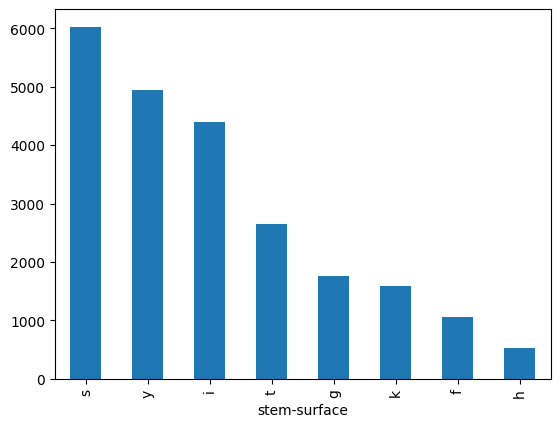

In [20]:
data['stem-surface'].value_counts().plot.bar()

## habitat

<Axes: xlabel='habitat'>

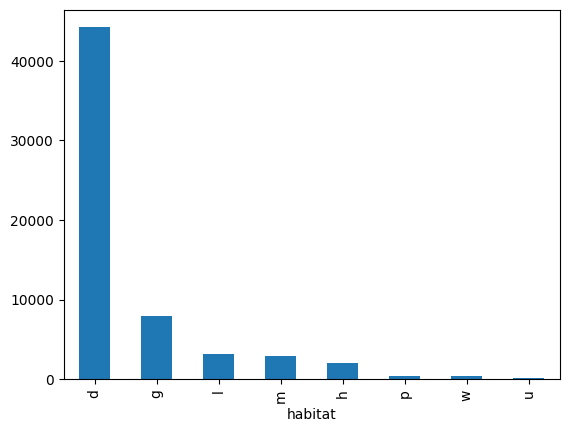

In [21]:
data['habitat'].value_counts().plot.bar()

kebanyak jamu hidup di d

## season

<Axes: xlabel='season'>

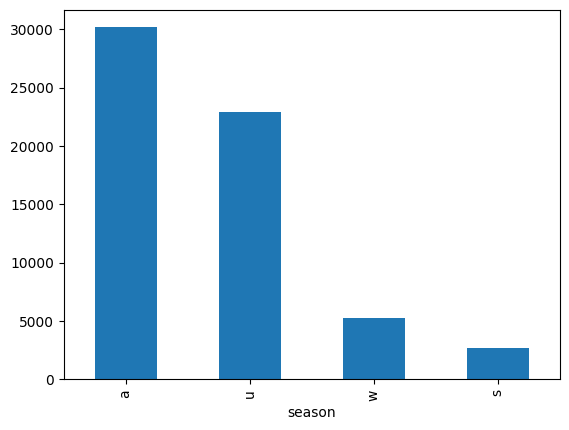

In [22]:
data['season'].value_counts().plot(kind='bar')

data sampling dit emukan terbanyak di musim a

## Class

<Axes: xlabel='class'>

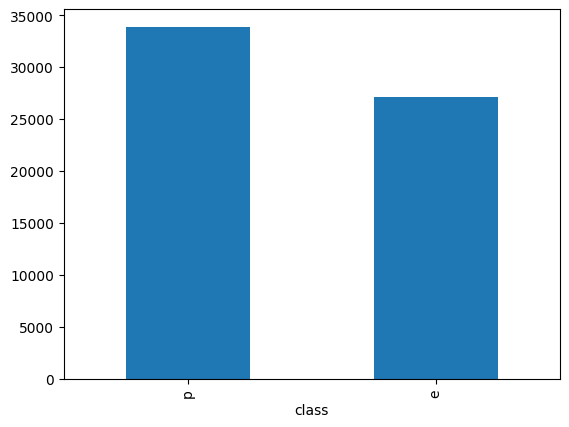

In [23]:
data['class'].value_counts().plot(kind='bar')

data kebanyakan jamur bercaun

# 5. Feature Engineering

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   class         61069 non-null  object 
 1   cap-diameter  61069 non-null  float64
 2   cap-shape     61069 non-null  object 
 3   cap-surface   46949 non-null  object 
 4   cap-color     61069 non-null  object 
 5   stem-height   61069 non-null  float64
 6   stem-width    61069 non-null  float64
 7   stem-root     9531 non-null   object 
 8   stem-surface  22945 non-null  object 
 9   habitat       61069 non-null  object 
 10  season        61069 non-null  object 
dtypes: float64(3), object(8)
memory usage: 5.1+ MB


karena ini kita akan memprediksi klasifikasi maka data kita harus bersih dari null atau na, di karenakan data yang null sebagian besar adalah data kategorik. maka kita hanya menggunakan data yang berisi saja

In [25]:
#meneggunakan data yang berisi setiap kolomnya
data_cleaned_rows = data.dropna()

In [26]:
#jumlah data
data_cleaned_rows.count()

class           3530
cap-diameter    3530
cap-shape       3530
cap-surface     3530
cap-color       3530
stem-height     3530
stem-width      3530
stem-root       3530
stem-surface    3530
habitat         3530
season          3530
dtype: int64

In [27]:
#split data
le=LabelEncoder()
data_split=data_cleaned_rows
x=data_split.drop(['class'],axis=1)
y=le.fit_transform(data_split['class'])
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=2)

## Kategorik dan numerik

In [28]:
#pemabgian type data
x_tr_data_kategorik=x_tr[['cap-shape','cap-surface','cap-color','stem-root','stem-surface','habitat','season']]
x_ts_data_kategorik=x_ts[['cap-shape','cap-surface','cap-color','stem-root','stem-surface','habitat','season']]
list_kategorik= list(x_tr_data_kategorik)
list_kategorik

['cap-shape',
 'cap-surface',
 'cap-color',
 'stem-root',
 'stem-surface',
 'habitat',
 'season']

In [29]:
#pemabgian type data
x_tr_data_numerik=x_tr.drop(columns=x_tr_data_kategorik)
x_ts_data_numerik=x_ts.drop(columns=x_tr_data_kategorik)
list_numerik= list(x_tr_data_numerik)
list_numerik

['cap-diameter', 'stem-height', 'stem-width']

## Numerik

### handling outlier

In [30]:
#cek skewness data
for kolom in x_tr_data_numerik.columns:
    print(kolom,x_tr_data_numerik[kolom].skew())

cap-diameter 1.3542647393221066
stem-height 0.5195949274150359
stem-width 1.332542256931817


In [31]:
def winsoriser(data_train):
    # Inisialisasi Winsorizer untuk kolom saat ini
    winsorizer = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=1.5
    )
    winsorizer2 = Winsorizer(
        capping_method='iqr',
        tail='both',
        fold=3
    )
    for column in data_train.columns:
        # Melakukan censoring pada data train (data_train)
        if (abs(data_train[column].skew())  <= 1) & (abs(data_train[column].skew()) >= 0.5):
            data_train[column] = winsorizer.fit_transform(data_train[[column]])
        else:
            data_train[column] = winsorizer2.fit_transform(data_train[[column]])

# Memanggil fungsi winsoriser dengan DataFrame x_tr_data_numerik
winsoriser(x_tr_data_numerik)

In [32]:
#cek skewness data
for kolom in x_tr_data_numerik.columns:
    print(kolom,x_tr_data_numerik[kolom].skew())

cap-diameter 1.327097795852536
stem-height 0.5195949274150359
stem-width 1.332542256931817


### Scaling

In [33]:
#simpen nama
kolomdata=x_tr_data_numerik

In [34]:
#scaling dengan robust
scaler = RobustScaler()
scaler.fit(x_tr_data_numerik)

x_tr_data_numerik=scaler.transform(x_tr_data_numerik)
x_ts_data_numerik=scaler.transform(x_ts_data_numerik)

menggunakan robust karena data tidak berdsitribusi normal

In [35]:
#kolom yang di olah
scaler.feature_names_in_

array(['cap-diameter', 'stem-height', 'stem-width'], dtype=object)

In [36]:
x_tr_data_numerik=pd.DataFrame(x_tr_data_numerik,columns=kolomdata.columns)
x_ts_data_numerik=pd.DataFrame(x_ts_data_numerik,columns=kolomdata.columns)
x_tr_data_numerik

,cap-diameter,stem-height,stem-width
0,0.272093,0.083015,0.320811
1,0.537209,-0.010923,0.616689
2,0.213953,-0.040779,0.179189
3,0.506977,0.055343,0.270279
4,-0.297674,-0.081558,-0.209774
...,...,...,...
2819,3.093023,0.673585,1.831449
2820,0.523256,-0.014564,0.165891
2821,-0.195349,-0.403423,-0.412566
2822,-0.346512,-0.403423,-0.412566


## Kategorik

In [37]:
x_tr_data_kategorik

,cap-shape,cap-surface,cap-color,stem-root,stem-surface,habitat,season
18317,f,s,n,b,i,d,u
15550,x,s,n,r,i,d,a
18302,f,s,n,b,i,d,u
18346,f,s,n,b,i,d,u
8076,f,d,n,b,i,l,u
...,...,...,...,...,...,...,...
51767,x,d,e,s,y,d,a
18199,f,s,n,b,i,d,u
56550,o,s,n,f,f,d,a
56584,o,t,w,f,f,d,u


In [38]:
#data yang mau di ohe
x_tr_ohe=x_tr_data_kategorik
x_ts_ohe=x_ts_data_kategorik

In [39]:
#onehot encoder
ohe = OneHotEncoder()

x_tr_ohe_encoded=ohe.fit_transform(x_tr_ohe)
x_ts_ohe_encoded=ohe.transform(x_ts_ohe)


In [40]:
#kolom yang gi olah
ohe.feature_names_in_

array(['cap-shape', 'cap-surface', 'cap-color', 'stem-root',
       'stem-surface', 'habitat', 'season'], dtype=object)

In [41]:
#menyimpan nama kolom
nama_fitur=ohe.get_feature_names_out()

In [42]:
#membuat data frame
x_tr_ohe_df=pd.DataFrame(x_tr_ohe_encoded.toarray(),columns=nama_fitur)
x_ts_ohe_df=pd.DataFrame(x_ts_ohe_encoded.toarray(),columns=nama_fitur)

In [43]:
#me rest index agar tidak menggabungkan data frame menurut index
x_tr_data_kategorik=x_tr_data_kategorik.reset_index(drop=True)
x_ts_data_kategorik=x_ts_data_kategorik.reset_index(drop=True)

In [44]:
#penggabungan 2 data frame
encoding_xtr = pd.concat([x_tr_data_kategorik,x_tr_ohe_df], axis=1)
encoding_xts = pd.concat([x_ts_data_kategorik,x_ts_ohe_df], axis=1)

In [45]:
encoding_xtr=encoding_xtr.drop(ohe.feature_names_in_,axis=1)
encoding_xtr

,cap-shape_b,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_x,cap-surface_d,cap-surface_g,cap-surface_h,cap-surface_l,cap-surface_s,...,stem-surface_s,stem-surface_y,habitat_d,habitat_g,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2820,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2821,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
encoding_xts=encoding_xts.drop(ohe.feature_names_in_,axis=1)
encoding_xts

,cap-shape_b,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_x,cap-surface_d,cap-surface_g,cap-surface_h,cap-surface_l,cap-surface_s,...,stem-surface_s,stem-surface_y,habitat_d,habitat_g,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
702,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
703,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
704,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Final

In [47]:
#pemindahan data
x_tr_data_kategorik=encoding_xtr.reset_index(drop=True)
x_ts_data_kategorik=encoding_xts.reset_index(drop=True)

In [48]:
#pemindahan data
x_tr_data_numerik=x_tr_data_numerik.reset_index(drop=True)
x_ts_data_numerik=x_ts_data_numerik.reset_index(drop=True)

In [49]:
#penyatuan data
x_tr_final=pd.concat([x_tr_data_numerik,x_tr_data_kategorik],axis=1)
x_ts_final=pd.concat([x_ts_data_numerik,x_ts_data_kategorik],axis=1)

In [50]:
x_tr_final

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_x,cap-surface_d,cap-surface_g,...,stem-surface_s,stem-surface_y,habitat_d,habitat_g,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,0.272093,0.083015,0.320811,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.537209,-0.010923,0.616689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.213953,-0.040779,0.179189,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.506977,0.055343,0.270279,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.297674,-0.081558,-0.209774,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,3.093023,0.673585,1.831449,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2820,0.523256,-0.014564,0.165891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2821,-0.195349,-0.403423,-0.412566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2822,-0.346512,-0.403423,-0.412566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
x_ts_final

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_x,cap-surface_d,cap-surface_g,...,stem-surface_s,stem-surface_y,habitat_d,habitat_g,habitat_l,habitat_m,season_a,season_s,season_u,season_w
0,1.681395,0.832332,0.743684,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.583721,0.723102,1.918551,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.327907,-0.403423,-0.412566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.476744,0.792281,0.710439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.067442,-0.403423,-0.412566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,-0.376744,-0.403423,-0.412566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
702,-0.437209,0.026215,-0.122008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
703,4.290698,0.964136,2.080785,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
704,2.083721,0.890588,0.725731,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## model

### cek cor

In [52]:
p_values = []
korelasi = []
cols = []

for col in x_tr_final.columns:
    corr_coef, p_value = stats.pearsonr(x_tr_final[col], y_tr)

    p_values.append(p_value)
    cols.append(col)
    #
    if p_value < 0.05:
        korelasi.append('korelasi')
    else :
        korelasi.append('tidak korelasi')


hasil = pd.DataFrame({'Nama Kolom': cols, 'p-value': p_values, 'korelasi': korelasi})
hasil

,Nama Kolom,p-value,korelasi
0,cap-diameter,6.670487e-221,korelasi
1,stem-height,9.199966e-72,korelasi
2,stem-width,0.000000e+00,korelasi
3,cap-shape_b,2.134587e-18,korelasi
4,cap-shape_f,6.127171e-30,korelasi
5,cap-shape_o,3.673829e-73,korelasi
6,cap-shape_p,4.905359e-149,korelasi
7,cap-shape_x,8.825014e-01,tidak korelasi
8,cap-surface_d,1.347639e-95,korelasi
9,cap-surface_g,5.573358e-10,korelasi


Kolom memiliki korelasi terhdap y

In [53]:
model_final_tr=x_tr_final
model_final_ts=x_ts_final

# 6. Model Definition

## Model KNN

In [54]:
# Training using KNN
knn = KNeighborsClassifier()

## Model SVM

In [55]:
#train using SVM linear
svm = SVC()


## desicion tree

In [56]:
dt= DecisionTreeClassifier()


## random forest

In [57]:
rf=RandomForestClassifier()


# 7. Model Training

## KNN

In [58]:
num_pipeline = make_pipeline(Winsorizer(),
                             RobustScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])

pipline_knn = make_pipeline(preprocessing_pipeline, knn)
pipline_knn.fit(x_tr, y_tr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'stem-root',
                                                   'stem-surface', 'habitat',
                                                   'season'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## SVM

In [59]:
num_pipeline = make_pipeline(Winsorizer(),
                             RobustScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])

pipline_svm = make_pipeline(preprocessing_pipeline, svm)
pipline_svm.fit(x_tr, y_tr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'stem-root',
                                                   'stem-surface', 'habitat',
                                                   'season'])])),
                ('svc', SVC())])

## descion tree

In [60]:
num_pipeline = make_pipeline(Winsorizer(),
                             RobustScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])

pipline_dt = make_pipeline(preprocessing_pipeline,dt)
pipline_dt.fit(x_tr, y_tr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'stem-root',
                                                   'stem-surface', 'habitat',
                                                   'season'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

## random forest

In [61]:
num_pipeline = make_pipeline(Winsorizer(),
                             RobustScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])

pipline_rf = make_pipeline(preprocessing_pipeline, rf)
pipline_rf.fit(x_tr, y_tr)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'cap-color', 'stem-root',
                                                   'stem-surface', 'habitat',
                                                   'season'])])),
                ('randomforestclassifier', RandomForestClassifier())])

# 8. Model Evaluation

## Base model

### KNN

In [62]:
y_pred_train_knn=pipline_knn.predict(x_tr)
y_pred_test_knn=pipline_knn.predict(x_ts)

In [63]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_tr, y_pred_train_knn))
print(classification_report(y_ts, y_pred_test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00      2242

    accuracy                           1.00      2824
   macro avg       1.00      1.00      1.00      2824
weighted avg       1.00      1.00      1.00      2824

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       582

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706



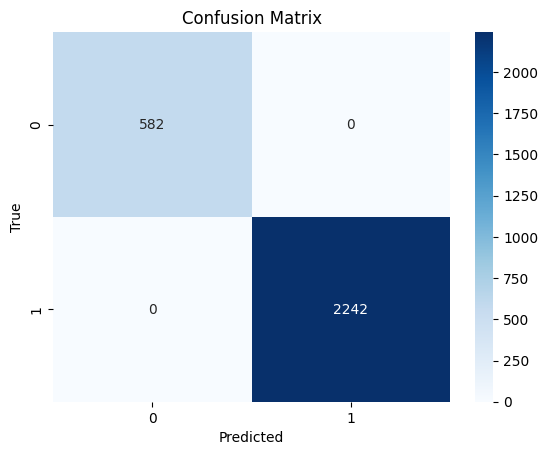

In [64]:
#conffusion matrix
sns.heatmap(confusion_matrix(y_tr, y_pred_train_knn), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

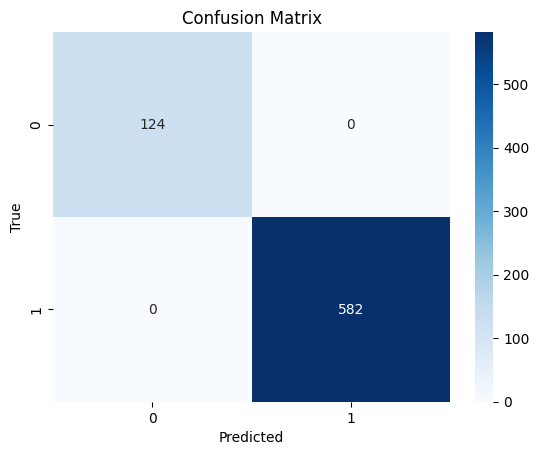

In [65]:
sns.heatmap(confusion_matrix(y_ts, y_pred_test_knn), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### SVM

In [66]:
y_pred_train_svm=pipline_svm.predict(x_tr)
y_pred_test_svm=pipline_svm.predict(x_ts)

In [67]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_tr, y_pred_train_svm))
print(classification_report(y_ts, y_pred_test_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00      2242

    accuracy                           1.00      2824
   macro avg       1.00      1.00      1.00      2824
weighted avg       1.00      1.00      1.00      2824

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       582

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706



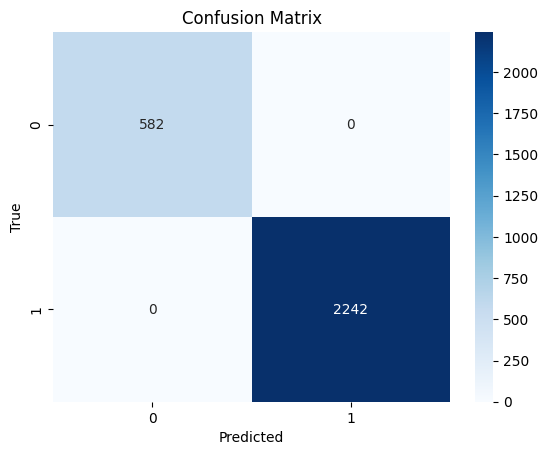

In [68]:
#confusion matrix
sns.heatmap(confusion_matrix(y_tr, y_pred_train_svm), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

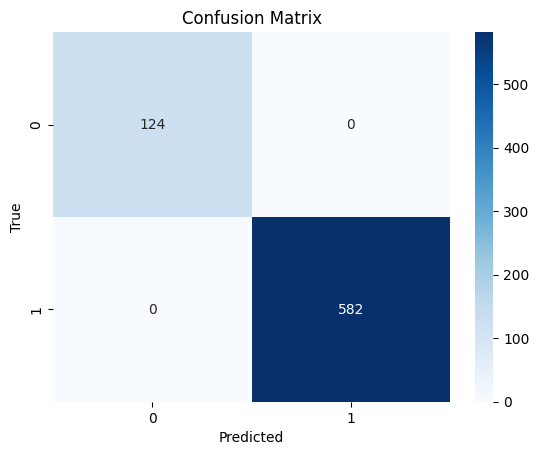

In [69]:
sns.heatmap(confusion_matrix(y_ts, y_pred_test_svm), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### desicion tree

In [70]:
y_pred_train_dt=pipline_dt.predict(x_tr)
y_pred_test_dt=pipline_dt.predict(x_ts)

In [71]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_tr, y_pred_train_dt))
print(classification_report(y_ts, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00      2242

    accuracy                           1.00      2824
   macro avg       1.00      1.00      1.00      2824
weighted avg       1.00      1.00      1.00      2824

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       582

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706



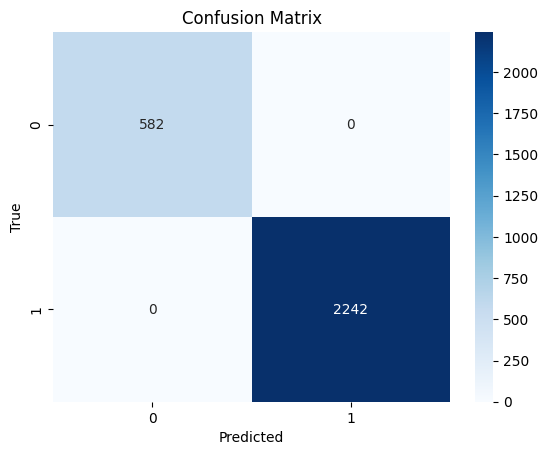

In [72]:
#confusion matrix
sns.heatmap(confusion_matrix(y_tr, y_pred_train_dt), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

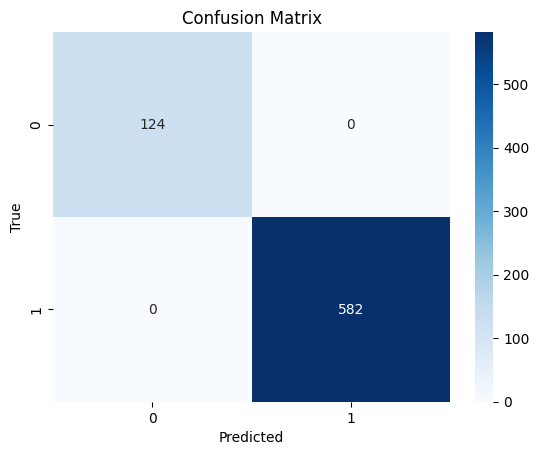

In [73]:
#confusion matrix
sns.heatmap(confusion_matrix(y_ts, y_pred_test_dt), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### random forest

In [74]:
y_pred_train_rf=pipline_rf.predict(x_tr)
y_pred_test_rf=pipline_rf.predict(x_ts)

In [75]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_tr, y_pred_train_rf))
print(classification_report(y_ts, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       1.00      1.00      1.00      2242

    accuracy                           1.00      2824
   macro avg       1.00      1.00      1.00      2824
weighted avg       1.00      1.00      1.00      2824

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       582

    accuracy                           1.00       706
   macro avg       1.00      1.00      1.00       706
weighted avg       1.00      1.00      1.00       706



Dari hasil base model yang kita buat mendapati bahwa accuracy nya 1 kita akan memvalidasi dengan menggunakan crosparameter, apakah kebetulan atau bukan?

## Hyperparamter tunning

### KNN

In [76]:
# Inisialisasi pipeline
num_pipeline = make_pipeline(Winsorizer(), RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])
pipeline_knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

# Menetapkan hyperparameter yang ingin ditelusuri
param_dist = {
    'kneighborsclassifier__n_neighbors': range(1, 100),  
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'],  
    'kneighborsclassifier__weights': ['uniform', 'distance']  
}



In [77]:
# Melakukan Random Search dengan 20 iterasi
random_search = RandomizedSearchCV(pipeline_knn, param_distributions=param_dist, n_iter=20, cv=5, random_state=2)
random_search.fit(x_tr, y_tr)

c:\Users\umicorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\umicorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\umicorn\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\umicorn\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('winsorizer',
                                                                                                Winsorizer()),
                                                                                               ('robustscaler',
                                                                                                RobustScaler())]),
                                                                               ['cap-diameter',
                                                                                'stem-height',
                                                                                'stem-width']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['cap-shape',
                                                                                'cap-surface',
                                                                                'cap-color',
                                                                                'stem-root',
                                                                                'stem-surface',
                                                                                'habitat',
                                                                                'season'])])),
                                             ('kneighborsclassifier',
                                              KNeighborsClassifier())]),
                   n_iter=20,
                   param_distributions={'kneighborsclassifier__metric': ['euclidean',
                                                                         'manhattan',
                                                                         'minkowski'],
                                        'kneighborsclassifier__n_neighbors': range(1, 100),
                                        'kneighborsclassifier__weights': ['uniform',
                                                                          'distance']},
                   random_state=2)

In [78]:
# hasil hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print('Best cross-validation accuracy : {:.2f}'.format(random_search.best_score_))

Best Hyperparameters: {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__n_neighbors': 17, 'kneighborsclassifier__metric': 'minkowski'}
Best Score: 1.0
Best cross-validation accuracy : 1.00


In [79]:
f1_train_cross_val = cross_val_score(pipeline_knn,
                                     x_tr,
                                     y_tr,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


### SVM

In [80]:
# Inisialisasi pipeline
num_pipeline = make_pipeline(Winsorizer(), RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])
pipeline_SVM = make_pipeline(preprocessing_pipeline, SVC())

# Menetapkan hyperparameter yang ingin ditelusuri
param_dist = {
    'svc__C': range(1, 100),  
    'svc__gamma': ['scale','auto'],  
    'svc__kernel': ['linear','poly','rbf'] 
}


In [81]:
# Melakukan Random Search dengan 20 iterasi
random_search_SVM = RandomizedSearchCV(pipeline_SVM, param_distributions=param_dist, n_iter=20, cv=5, random_state=2)
random_search_SVM.fit(x_tr, y_tr)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('winsorizer',
                                                                                                Winsorizer()),
                                                                                               ('robustscaler',
                                                                                                RobustScaler())]),
                                                                               ['cap-diameter',
                                                                                'stem-height',
                                                                                'stem-width']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['cap-shape',
                                                                                'cap-surface',
                                                                                'cap-color',
                                                                                'stem-root',
                                                                                'stem-surface',
                                                                                'habitat',
                                                                                'season'])])),
                                             ('svc', SVC())]),
                   n_iter=20,
                   param_distributions={'svc__C': range(1, 100),
                                        'svc__gamma': ['scale', 'auto'],
                                        'svc__kernel': ['linear', 'poly',
                                                        'rbf']},
                   random_state=2)

In [82]:
# hasil hyperparameters and score
print("Best Hyperparameters:", random_search_SVM.best_params_)
print("Best Score:", random_search_SVM.best_score_)
print('Best cross-validation accuracy : {:.2f}'.format(random_search_SVM.best_score_))

Best Hyperparameters: {'svc__kernel': 'rbf', 'svc__gamma': 'scale', 'svc__C': 72}
Best Score: 1.0
Best cross-validation accuracy : 1.00


In [83]:
f1_train_cross_val = cross_val_score(pipeline_SVM,
                                     x_tr,
                                     y_tr,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


### descion tree

In [84]:
# Inisialisasi pipeline
num_pipeline = make_pipeline(Winsorizer(), RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])
pipeline_DT = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

# Menetapkan hyperparameter yang ingin ditelusuri
param_dist = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss'],  
    'decisiontreeclassifier__max_depth': range(2,100),  
    'decisiontreeclassifier__splitter': ['best', 'random'],
    'decisiontreeclassifier__max_features':['sqrt', 'log2'],
    'decisiontreeclassifier__max_leaf_nodes':range(2,100)  
}

In [85]:
# Melakukan Random Search dengan 20 iterasi
random_search = RandomizedSearchCV(pipeline_DT, param_distributions=param_dist, n_iter=20, cv=5, random_state=2)
random_search.fit(x_tr, y_tr)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('winsorizer',
                                                                                                Winsorizer()),
                                                                                               ('robustscaler',
                                                                                                RobustScaler())]),
                                                                               ['cap-diameter',
                                                                                'stem-height',
                                                                                'stem-width']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['cap-shape',
                                                                                'cap-surface...
                                              DecisionTreeClassifier())]),
                   n_iter=20,
                   param_distributions={'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy',
                                                                              'log_loss'],
                                        'decisiontreeclassifier__max_depth': range(2, 100),
                                        'decisiontreeclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'decisiontreeclassifier__max_leaf_nodes': range(2, 100),
                                        'decisiontreeclassifier__splitter': ['best',
                                                                             'random']},
                   random_state=2)

In [86]:
# hasil hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print('Best cross-validation accuracy : {:.2f}'.format(random_search.best_score_))

Best Hyperparameters: {'decisiontreeclassifier__splitter': 'random', 'decisiontreeclassifier__max_leaf_nodes': 69, 'decisiontreeclassifier__max_features': 'sqrt', 'decisiontreeclassifier__max_depth': 63, 'decisiontreeclassifier__criterion': 'log_loss'}
Best Score: 1.0
Best cross-validation accuracy : 1.00


In [87]:
f1_train_cross_val = cross_val_score(pipeline_DT,
                                     x_tr,
                                     y_tr,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1.         1.         1.         0.99888765 0.99888517]
F1 Score - Mean - Cross Validation :  0.9995545651491872
F1 Score - Std - Cross Validation  :  0.0005455446128339095
F1 Score - Range of Test-Set       :  0.9990090205363532 - 1.000100109762021


### random forest

In [88]:
# Inisialisasi pipeline
num_pipeline = make_pipeline(Winsorizer(), RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, list_numerik),
    ('pipe_cat', cat_pipeline, list_kategorik)
])
pipeline_RF = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

# Menetapkan hyperparameter yang ingin ditelusuri
param_dist = {
    'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],  
    'randomforestclassifier__max_depth': range(2,100),
    'randomforestclassifier__max_features':['sqrt', 'log2'],
    'randomforestclassifier__max_leaf_nodes':range(2,100)  
}

In [89]:
# Perform Random Search dengan 20 iterations
random_search = RandomizedSearchCV(pipeline_RF, param_distributions=param_dist, n_iter=20, cv=5, random_state=2)
random_search.fit(x_tr, y_tr)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipe_num',
                                                                               Pipeline(steps=[('winsorizer',
                                                                                                Winsorizer()),
                                                                                               ('robustscaler',
                                                                                                RobustScaler())]),
                                                                               ['cap-diameter',
                                                                                'stem-height',
                                                                                'stem-width']),
                                                                              ('pipe_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['cap-shape',
                                                                                'cap-surface...
                                                                                'stem-surface',
                                                                                'habitat',
                                                                                'season'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20,
                   param_distributions={'randomforestclassifier__criterion': ['gini',
                                                                              'entropy',
                                                                              'log_loss'],
                                        'randomforestclassifier__max_depth': range(2, 100),
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__max_leaf_nodes': range(2, 100)},
                   random_state=2)

In [90]:
# hasil hyperparameters and score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
print('Best cross-validation accuracy : {:.2f}'.format(random_search.best_score_))

Best Hyperparameters: {'randomforestclassifier__max_leaf_nodes': 65, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 84, 'randomforestclassifier__criterion': 'entropy'}
Best Score: 1.0
Best cross-validation accuracy : 1.00


In [91]:
f1_train_cross_val = cross_val_score(pipeline_RF,
                                     x_tr,
                                     y_tr,
                                     cv=5,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [1. 1. 1. 1. 1.]
F1 Score - Mean - Cross Validation :  1.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  1.0 - 1.0


Dari hasil di atas di dapati model terbaik merupakan SVM Karena f1 score validation di setiap inisialisasinya bernilai 1 dan dia memiliki proses tercepat maka Yang terbaik adalah SVM

dari hasil kita dapati bahwa akurasi dari model berniali 1 bukan lah Kebetulan 

# 9. Model Saving

In [92]:
#model saving
with open('list_kat.txt', 'w') as file_1:
  json.dump(list_kategorik, file_1)

with open('list_num.txt', 'w') as file_2:
  json.dump(list_numerik, file_2)

with open('random_search_SVM.pkl', 'wb') as file_3:
  pickle.dump(random_search_SVM, file_3)